In [ ]:
%load_ext lab_black

## Decision Trees

In this notebook, we will implement a decision in Python. We'll start with a single decision tree and a simple problem, and then work our way to a random forest. Once we understand how a single decision tree works, we can transfer this knowledge to an entire forest of trees.

> [Nice introductory video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=528s)


### What is a decision tree


<div>
<img src="figures/decision_trees.png" width="700"/>
</div>

A simple linear classifier will not be able to draw a boundary that separates the classes. The single decision tree will be able to completely separate the points because it essentially draws many repeated linear boundaries between points. A decision tree is a non-parametric model because the number of parameters grows with the size of the data.


**Decision tree pseudocode**
- Calculate Total Gini Impurity for all possible nodes or subdivisions.
- Select the node with the smallest total Gini impurity
- Go to the next decision level of a (sub)tree
- Repeat as required or until only ‘pure’ nodes are created



>**NOTE**: DTs are easy to built, use and interpret **BUT** they are limited!
>
>Their main disadvantage: **INACCURAY**, since they are not flexible with new samples


#### **Example**: Building a Decision Tree from scratch

>
> First, a decision tree is to be generated by hand from the following admittedly rather artificial data set. 
 
| Clouds | Temperature | Rain | 
| :-: | :-: | :-: |
| yes   | mild       | yes   |
| no | mild       | no |
| yes   | cold       | no |
| no   | cold       | no |
| no | hot       | no |
| no | mild       | no |
| yes   | hot       | yes   | 


> The tree should give us the answer as to whether it is raining or not - so "rain" should close the tree as the leaf node. The first step is to determine whether "clouds" or "temperature" is a better choice for the first decision level, i.e. the root node of the tree.
>
>Gini impurity is used for this decision:
>
>\begin{eqnarray*}
Gini(D) = 1 - \sum_{i=1}^k p_i^2.
\end{eqnarray*}
>
>The running index "i" $\in$ [1,2] describes the target classes of the leaf nodes to be distinguished, in this case [rain-yes,rain-no]. The probability $p_1$ or $p_2$ is therefore the probability of rain or no rain in data set D.
>
>The total gini-impurity of a node which splits data set D with $n$ entries into e.g. 2 sub-data sets $D_a$ and $D_b$ with $n_a$ and $n_b$ entries respectively, is calculated from the weighted average of the respective individual gini-impurities:
>
>\begin{eqnarray*}
Gini(D) = \frac{n_a}{n} Gini(D_a) + \frac{n_b}{n} Gini(D_b),
\end{eqnarray*}
>
> where the indices $a$ and $b$ could stand for clouds=yes and clouds=no, for example.
>
> #### **Exercise A**:
> We now calculate the total gini-impurity of each of the following possible root nodes:
> 
> Clouds $=$ yes or no
> 
> Temperature $=$ cold, mild or hot
>
> 
> #### **Exercise B**:
> The node with the lowest total Gini impurity is suitable as the first decision node or root node of the tree.
Determine the total Gini impurity for the first internal nodes of the 2 remaining discriminators, namely for the 2 branches of the root node.


In [1]:
### Your code here ####

#### solution

In [2]:
def gini(p1,p2):
    GI = 1 - (p1**2 + p2**2)
    return GI

In [3]:
## 1. cloud no
## results in: rain no --> 4 times, rain yes --> 0 times
p1 = 0/4 # rain no
p2 = 4/4 # rain yes

gini(p1,p2)

0.0

In [4]:
## 2. cloud yes
## results in: rain no --> 1 times, rain yes --> 2 times

p1 = 2/3 # rain yes
p2 = 1/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [5]:
## Calculating total GINI Impurity for the node "clouds"

na = 4 # total entries of clouds no
nb = 3 # total entries of clouds yes

p1a = 0/4 # cloud no, rain no
p2a = 4/4 # cloud no, rain yes

p1b = 2/3 # cloud yes, rain yes
p2b = 1/3 # cloud yes, rain no 


def total_gini(p1a,p2a,p1b,p2b,na, nb):
    GI = na/(na+nb) * gini(p1a,p2a) + nb/(na+nb) * gini(p1b,p2b)
    return GI

total_gini(p1a,p2a,p1b,p2b,na, nb)



0.19047619047619047

Calculating total GINI Impurity for the node "temperature"

In [6]:
## 1. temperature cold 
## results in: rain no --> 2 times, rain yes --> 0 times

p1 = 0/2 # rain yes
p2 = 2/2 # rain no 

gini(p1,p2)

0.0

In [7]:
## 2. temperature mild 
## results in: rain no --> 2 times, rain yes --> 1 times

p1 = 1/3 # rain yes
p2 = 2/3 # rain no 

gini(p1,p2)

0.4444444444444444

In [8]:
## 2. temperature hot 
## results in: rain no --> 1 times, rain yes --> 1 times

p1 = 1/2 # rain yes
p2 = 1/2 # rain no 

gini(p1,p2)

0.5

### Decision trees in Scikit-learn
Next, we  build and train a single decision tree on the data using `scikit-learn`. The tree will learn how to separate the points, building a flowchart of questions based on the feature values and the labels. At each stage, the decision tree makes splits by maximizing the reduction in Gini impurity.  We'll use the default hyperparameters for the decision tree which means it can grow as deep as necessary in order to completely separate the classes. This will lead to overfitting because the model memorizes the training data, and in practice, we usually want to limit the depth of the tree so it can generalize to testing data.

In [2]:
%load_ext lab_black

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import (
    metrics,
)  # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [4]:
# load data

data = {
    "clouds": [1, 0, 1, 0, 0, 0, 1],
    "temp": [10, 20, -3, -5, 25, 10, 30],
    "rain": [1, 0, 0, 0, 0, 0, 1],
}
df = pd.DataFrame.from_dict(data)
df

,clouds,temp,rain
0,1,10,1
1,0,20,0
2,1,-3,0
3,0,-5,0
4,0,25,0
5,0,10,0
6,1,30,1


In [5]:
# split dataset in features and target variable
feature_cols = ["clouds", "temp"]
X = df[feature_cols]  # Features
y = df.rain  # Target variable

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)  # 70% training and 30% test

In [7]:
X_train

,clouds,temp
0,1,10
4,0,25
3,0,-5
5,0,10


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini")

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)


y_train_pred = clf.predict(X_train)

In [9]:
# Model Accuracy based on training data, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


[Text(0.5, 0.75, 'clouds <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

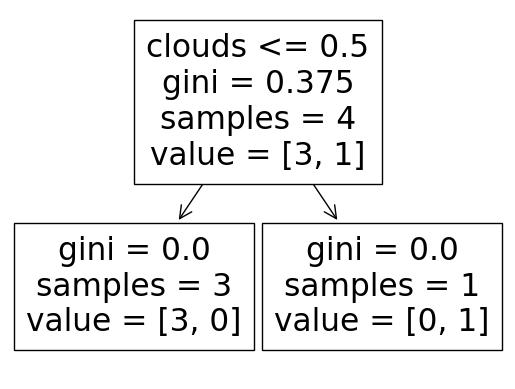

In [10]:
tree.plot_tree(clf, feature_names=feature_cols)

In [11]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

## Model Accuracy, how often is the classifier correct based on the test data?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [12]:
print(clf.predict([[0, -5]]))  ##clouds, temp

[0]


/opt/anaconda3/envs/jupyter_book_ml/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X, y)}")
print(f"% Var explained: {model.score(X, y) * 100}")


print(f"% OOB score: {1 - model.oob_score_}")

Mean of squared residuals: 0.8571428571428571
% Var explained: 85.71428571428571
% OOB score: 0.25


In [24]:
# Statistiken über das Modell ausgeben lassen und die 10 wichtigsten Variablen extrahieren
stats = model.get_params()
feature_importance = model.feature_importances_
features = X.columns
var_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
var_imp_df = var_imp_df.sort_values(by = 'Importance', ascending = False).head(54)
var_imp_10 = var_imp_df.head(10)

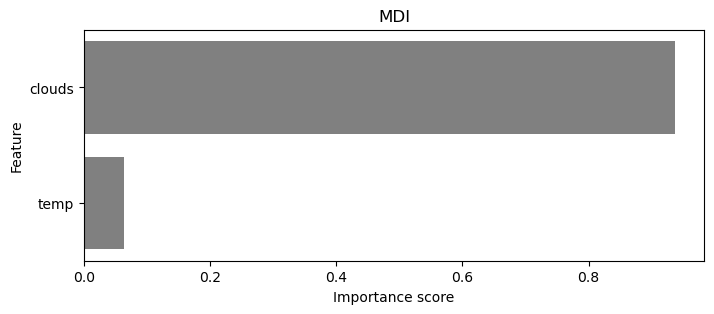

In [25]:
# Plotten der wichtigsten Variablen
plt.figure(figsize = (8, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = var_imp_10, color = 'gray')
plt.title("MDI")
plt.xlabel("Importance score")
plt.ylabel("Feature")

plt.show()



<div>
<img src="5_RF_figures/bild1.png" width="700"/>
</div>

**Sample locations**

The data set and further information about the sampling process can be found
[here](https://doi.pangaea.de/10.1594/PANGAEA.944811).


Let us take a closer look at the data:

In [26]:
# Importieren der pandas- und requests-Bibliothek sowie des StringIO-Moduls
import pandas as pd
import requests
from io import StringIO

# Daten über URL einlesen
url = "https://doi.pangaea.de/10.1594/PANGAEA.944811?format=textfile"

response = requests.get(url)
IsoW06 = pd.read_csv(StringIO(response.text), sep = '\t', skiprows = 267, header = 1, encoding = "UTF-8", 
                     engine = 'python', on_bad_lines = 'skip')

In [27]:
# Anzeigen der ersten 6 Dateneinträge
IsoW06.head(6)

,Event,Sample ID,Latitude,Longitude,Date/Time,Samp type,Sample comment,δ18O H2O [‰ SMOW],δD H2O [‰ SMOW],δ18O H2O std dev [±],δD H2O std dev [±]
0,WaterSA_SLW1,SLW1,-33.88917,18.96917,2016-08-29,River,River at Pniel,-3.54,-14.50,0.09,0.64
1,WaterSA_SLW2,SLW2,-33.87800,19.03517,2016-08-29,River,River Berg; abundant with insect larvae; dam u...,-3.33,-13.62,0.09,0.45
2,WaterSA_SLW3,SLW3,-33.93667,19.17000,2016-08-29,River,Minor waterfall; iron rich,-4.44,-22.33,0.04,0.59
3,WaterSA_SLW4,SLW4,-33.69350,19.32483,2016-08-29,River,River; abundant with insect larvae,-4.28,-22.70,0.07,0.30
4,WaterSA_SLW5,SLW5,-33.54333,19.20733,2016-08-29,River,River Bree,-4.09,-18.99,0.04,0.34
5,WaterSA_SLW6,SLW6,-33.33367,19.87767,2016-08-30,Lake,Reservoir lake; under almost natural condition...,-2.59,-18.59,0.10,0.29


The data set contains 188 samples and the following 11 variables: 
Event, Sample ID, Latitude, Longitude, Date/Time, Samp type, Sample comment, δ18O H2O [‰ SMOW], δD H2O [‰ SMOW], δ18O H2O std dev [±], δD H2O std dev [±]. The isotope ratios are expressed in the conventional delta notation (δ18O, δ2H) in per mil (‰) relative to VSMOW ([Vienna Standard Mean Ocean Water](https://en.wikipedia.org/wiki/Vienna_Standard_Mean_Ocean_Water).

#### Ressources for this script: 

* [Koehrsen 2010](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)


In [13]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)

In [14]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)